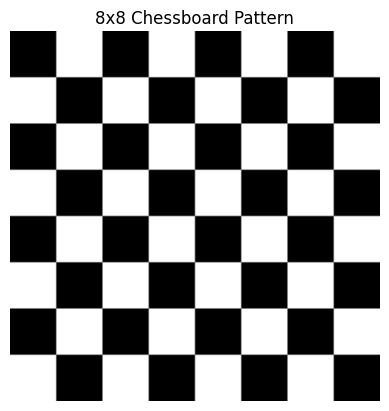

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Generate chessboard pattern
def create_chessboard():
    chessboard = np.zeros([8*20, 8*20])
    for row in range(0, 8):
        for column in range(0, 8):
            if ((column + 8 * row) % 2 == 1 and row % 2 == 0) or ((column + 8 * row) % 2 == 0 and row % 2 == 1):
                chessboard[row*20:row*20+20, column*20:column*20+20] = 1
    return chessboard

# Create and display the chessboard
chessboard = create_chessboard()

# Plotting the chessboard
plt.imshow(chessboard, cmap='gray')
plt.title('8x8 Chessboard Pattern')
plt.axis('off')
plt.show()


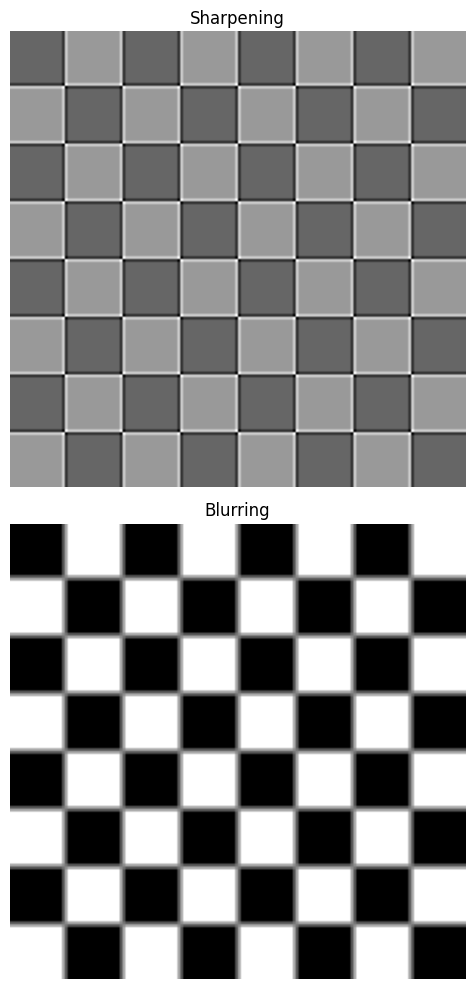

In [22]:

# Define the 2D convolution function from the provided code
def conv_2d(A, kernel):
    output = np.zeros([A.shape[0] - (kernel.shape[0] - 1), A.shape[1] - (kernel.shape[1] - 1)])
    
    for row in range(1, A.shape[0] - 1):
        for column in range(1, A.shape[1] - 1):
            output[row - 1, column - 1] = np.tensordot(A[row - 1:row + 2, column - 1:column + 2], kernel)
    
    return output

# Define the four kernels
kernels = {
    "Sharpening": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    "Blurring": np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 10
}

# Apply the convolution for each kernel and display the results
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs = axs.flatten()

for i, (name, kernel) in enumerate(kernels.items()):
    convoluted_chessboard = conv_2d(chessboard, kernel)
    
    # Normalize the convoluted image
    normalized_image = (convoluted_chessboard - np.min(convoluted_chessboard)) / (np.max(convoluted_chessboard) - np.min(convoluted_chessboard))
    
    axs[i].imshow(normalized_image, cmap='gray')
    axs[i].set_title(name)
    axs[i].axis('off')

plt.tight_layout()
plt.show()